
## EXERCICE 4 : Utilisation de Pandas et sklearn pour l'analyse de données réelles



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Question 1 : 
- utiliser la fonction pandas.read_csv avec les bonnes options pour charger le fichier RealMedicalData.csv. On remarquera que le separateur dans le fichier csv est ';' et que les decimales sont representees par des virgules et non des points. Il est important de remarquer qu'un dataframe et non un numpy array sera retourne. Cette classe contient l'equivalent d'un numpy.array mais aussi le nom des lignes et colonnes, tout comme dans les dataframes de R
- Extraire deux numpy.arrays X et y des donnes pour faire par la suite de la regression. Nous allons essayer d'expliquer  'Disease progression' avec les autres variables. Ce sera alors la colonne qui contient y. Les autres colonnes contiendront les donnees de X.
- Une fois X et y extrait, centrer et reduire X. La fonction sklearn.preprocessing.scale pourra etre utilisee


In [7]:
data_medic=pd.read_csv("/RealMedicalData.csv",sep=";",decimal=",")
data_medic

,Acid 1 density,Acid 2 density,Acid 3 density,Cells 1 density,Cells 2 density,Pressure 1,Pressure 2,Bio-marker 1,Bio-marker 2,Biomarker 3,Biomarker 4,Biomarker 5,Biomarker 6,Biomarker 6.1,Biomarker 7,Biomarker 8,Biomarker 9,Biomarker 10,Disease progression
0,11.6,6.4,4.30,7.2,14.4,19.26,39.32,50.00,13.040000,0.20,0.0440,2.44,2.209,9.02,0.26,1.23,3.56,16.91,6
1,15.5,10.5,4.90,6.9,13.7,8.57,36.78,22.57,18.713333,0.51,0.8501,2.32,0.339,22.43,0.10,0.56,7.06,-3.47,6
2,15.3,6.5,4.20,6.4,13.6,13.48,25.90,8.25,8.246667,0.27,0.9629,2.83,0.339,17.94,0.13,0.59,3.20,10.05,10
3,13.4,7.7,4.10,5.8,14.2,15.23,44.36,11.09,11.093333,0.67,-0.2756,5.06,1.611,11.38,0.20,0.88,4.33,-3.62,18
4,16.0,5.2,3.20,5.7,12.8,8.37,19.62,7.44,6.386667,0.24,-0.6928,1.59,0.659,8.56,0.27,1.20,4.57,1.56,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,8.9,4.8,3.45,5.6,13.5,9.18,41.71,50.00,18.213333,0.01,0.9721,1.00,0.820,12.66,0.18,0.28,5.44,6.14,6
62,18.2,5.1,3.78,5.9,13.5,11.44,33.50,42.34,11.293333,0.05,0.5524,2.45,1.384,34.88,0.07,2.19,6.75,1.75,10
63,21.0,10.3,7.00,6.6,10.8,5.78,14.53,11.09,5.460000,0.01,0.9468,2.04,1.403,21.92,0.11,0.76,2.37,1.97,13
64,11.0,4.8,3.86,5.6,13.0,7.52,20.38,9.17,7.453333,0.19,0.6871,1.92,1.006,11.49,0.20,0.51,2.34,2.11,11


In [8]:
X=data_medic.iloc[:,:17].to_numpy()
Y=data_medic['Disease progression'].to_numpy()

In [9]:
X_centered=preprocessing.scale(X)

In [10]:
y_centered=preprocessing.scale(Y)


### Question 2 : 
- Mettre en lien X et y a l'aide de la regression lineaire multiple avec une penalisation Lasso
- A la vue des resultats, quelle variable vous semble liee a 'Disease progression'?
- Verifier cette relation en representant des nuages de points mettant en lien les observations de chaque variable avec les observations de 'Disease progression'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.971e+00, tolerance: 4.718e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_

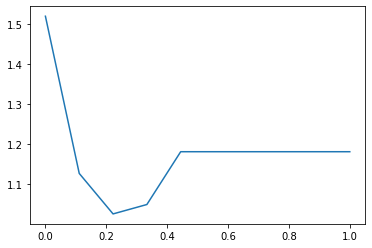

In [22]:
thresh=50
alphas=np.linspace(0,1,10)
mse=np.zeros(10)
for i,alpha in enumerate(alphas) :
  X_train,y_train=X_centered[:thresh,:],y_centered[:thresh]
  X_test, y_test=X_centered[thresh:,:],y_centered[thresh:]

  lasso_regressor=linear_model.Lasso(alpha=alpha)
  lasso_regressor.fit(X_train,y_train)
  y_pred=lasso_regressor.predict(X_test)
  mse[i]=mean_squared_error(y_test,y_pred)

fig=plt.figure()
plt.plot(alphas,mse)

In [ ]:
alphas=


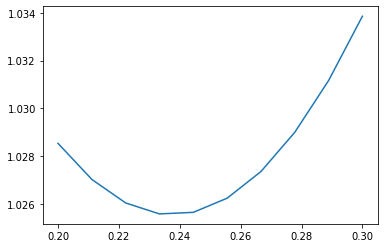

In [23]:
alphas=np.linspace(0.2,0.3,10)
mse=np.zeros(10)
for i,alpha in enumerate(alphas) :
  X_train,y_train=X_centered[:thresh,:],y_centered[:thresh]
  X_test, y_test=X_centered[thresh:,:],y_centered[thresh:]

  lasso_regressor=linear_model.Lasso(alpha=alpha)
  lasso_regressor.fit(X_train,y_train)
  y_pred=lasso_regressor.predict(X_test)
  mse[i]=mean_squared_error(y_test,y_pred)

fig=plt.figure()
plt.plot(alphas,mse)

In [24]:
alpha=0.24
X_train,y_train=X_centered[:thresh,:],y_centered[:thresh]
X_test, y_test=X_centered[thresh:,:],y_centered[thresh:]

lasso_regressor=linear_model.Lasso(alpha=alpha)
lasso_regressor.fit(X_train,y_train)
lasso_regressor.coef_

array([ 0.22417575, -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.0663961 ])